# Plotting for viral analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dat_dir = "/usersdata/yuanhua/msNewData/"

## uncounted reads
viral_dir = dat_dir + '/virus833_xf25/'

## Load viral counts

In [3]:
from scipy.io import mmread
from scipy.sparse import csc_matrix
viral_mat = csc_matrix(mmread(viral_dir + 'cell_viral833.mtx'))
viral_mat

<96732x833 sparse matrix of type '<class 'numpy.int64'>'
	with 302865 stored elements in Compressed Sparse Column format>

In [4]:
df_virus = pd.read_csv(viral_dir + 'viruses_833.id_notes.tsv', sep='\t', header=None)
df_virus.columns = ['ID', 'INFO']
df_virus

,ID,INFO
0,virus1,"NC_001499.1_Abelson_murine_leukemia_virus,_com..."
1,virus2,"NC_002077.1_Adeno-associated_virus_-_1,_comple..."
2,virus3,"NC_001401.2_Adeno-associated_virus_-_2,_comple..."
3,virus4,"NC_001729.1_Adeno-associated_virus_-_3,_comple..."
4,virus5,"NC_001829.1_Adeno-associated_virus_-_4,_comple..."
...,...,...
828,virus829,hervs_30200_100017_con_chaindnarm HERVS
829,virus830,hervl32_30220_1946_bre_chaindnarm HERVL32
830,virus831,hervl66_30210_6207_bre_chaindnarm HERVL66
831,virus832,ltr57_30100_4146_bre_chaindnarm LTR57


In [5]:
info_short = [x.split('(')[-1].split(')')[0] for x in df_virus['INFO']]
info_short = [x.split()[-1].split(',')[0] for x in info_short]
df_virus['viral_info'] = info_short
df_virus

,ID,INFO,viral_info
0,virus1,"NC_001499.1_Abelson_murine_leukemia_virus,_com...",NC_001499.1_Abelson_murine_leukemia_virus
1,virus2,"NC_002077.1_Adeno-associated_virus_-_1,_comple...",NC_002077.1_Adeno-associated_virus_-_1
2,virus3,"NC_001401.2_Adeno-associated_virus_-_2,_comple...",NC_001401.2_Adeno-associated_virus_-_2
3,virus4,"NC_001729.1_Adeno-associated_virus_-_3,_comple...",NC_001729.1_Adeno-associated_virus_-_3
4,virus5,"NC_001829.1_Adeno-associated_virus_-_4,_comple...",NC_001829.1_Adeno-associated_virus_-_4
...,...,...,...
828,virus829,hervs_30200_100017_con_chaindnarm HERVS,HERVS
829,virus830,hervl32_30220_1946_bre_chaindnarm HERVL32,HERVL32
830,virus831,hervl66_30210_6207_bre_chaindnarm HERVL66,HERVL66
831,virus832,ltr57_30100_4146_bre_chaindnarm LTR57,LTR57


In [6]:
from scipy.sparse import hstack, csc_matrix

# define pan virus
viral_mat = csc_matrix(hstack([viral_mat, viral_mat[:, :].sum(1)]))
# viral_mat = csc_matrix(hstack([viral_mat, viral_mat[:, :769].sum(1)]))

df_virus.loc[833] = ["VirusPool", "VirusPool", "VirusPool"]

In [7]:
viral_mat

<96732x834 sparse matrix of type '<class 'numpy.int64'>'
	with 388097 stored elements in Compressed Sparse Column format>

In [8]:
df_cell_info = pd.read_csv(viral_dir + 'cell_info.tsv', sep='\t', index_col=0)

/home/yuanhua/.conda/envs/TFProb/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (28,29,34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
df_cell_info

,cell,batch,donorseq,donor_id,tissue,doublet_score,doublet_label,assigned,affection,disease,...,Celltypes,Include,Celltypes_master,Celltypes_master_higher,celltype,celltype_group,use_cell,total_log10_counts,viral,MS study; log2(EBV_UMI+1)
cell_id,,,,,,,,,,,,,,,,,,,,,
S14618-G1-AAAGTAGCACGTTGGC,AAAGTAGCACGTTGGC-1-0,0,S14618-G1,TU0531,CSF,0.463,False,True,1.0,NIND,...,Macrophage_SPP1,True,Macrophage,Myeloid,macrophage,Myeloid,True,3.416474,3,0.0
S14618-G1-AAGGAGCCATACGCCG,AAGGAGCCATACGCCG-1-0,0,S14618-G1,TU0531,CSF,0.304,False,True,1.0,NIND,...,T_CD4_CTL,True,T_CD4,T_cell,CD4+ T cell,Lymphoid,True,3.555095,3,0.0
S14618-G1-AATCGGTTCCGAATGT,AATCGGTTCCGAATGT-1-0,0,S14618-G1,TU0531,CSF,0.478,False,True,1.0,NIND,...,T_CD4,True,T_CD4,T_cell,CD4+ T cell,Lymphoid,True,3.511883,4,0.0
S14618-G1-ACACCAAAGTGCGTGA,ACACCAAAGTGCGTGA-1-0,0,S14618-G1,TU0531,CSF,0.282,False,True,1.0,NIND,...,T_CD8,True,T_CD8,T_cell,CD8+ T cell,Lymphoid,True,3.434729,2,0.0
S14618-G1-ACACCGGGTTCCACAA,ACACCGGGTTCCACAA-1-0,0,S14618-G1,TU0531,CSF,0.338,False,True,1.0,NIND,...,T_CD8,True,T_CD8,T_cell,CD8+ T cell,Lymphoid,True,3.478999,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S14619-H3-TTTGGTTCAAAGGAAG,TTTGGTTCAAAGGAAG-1-83,83,S14619-H3,TU0548,CSF,0.054,False,True,2.0,MS,...,T_CD4,True,T_CD4,T_cell,CD4+ T cell,Lymphoid,True,3.452553,2,0.0
S14619-H3-TTTGGTTGTTTGTTTC,TTTGGTTGTTTGTTTC-1-83,83,S14619-H3,TU0548,CSF,0.227,False,True,2.0,MS,...,cDC2,True,cDC2,Myeloid,cDC2,Myeloid,True,3.764027,3,0.0
S14619-H3-TTTGTCAAGTTGAGTA,TTTGTCAAGTTGAGTA-1-83,83,S14619-H3,TU0548,CSF,0.083,False,True,2.0,MS,...,T_CD4,True,T_CD4,T_cell,CD4+ T cell,Lymphoid,True,3.531479,4,0.0


In [10]:
col_use = ['donor_id', 'disease', 'Celltype', 'total_counts', 'viral']
df_cell_lite = df_cell_info[col_use]
df_cell_lite

,donor_id,disease,Celltype,total_counts,viral
cell_id,,,,,
S14618-G1-AAAGTAGCACGTTGGC,TU0531,NIND,Macrophage,2443.8042,3
S14618-G1-AAGGAGCCATACGCCG,TU0531,NIND,T_CD4,3350.4514,3
S14618-G1-AATCGGTTCCGAATGT,TU0531,NIND,T_CD4,3032.3098,4
S14618-G1-ACACCAAAGTGCGTGA,TU0531,NIND,T_CD8,2533.8962,2
S14618-G1-ACACCGGGTTCCACAA,TU0531,NIND,T_CD8,2811.6406,4
...,...,...,...,...,...
S14619-H3-TTTGGTTCAAAGGAAG,TU0548,MS,T_CD4,2743.6782,2
S14619-H3-TTTGGTTGTTTGTTTC,TU0548,MS,Monocyte,5541.5200,3
S14619-H3-TTTGTCAAGTTGAGTA,TU0548,MS,T_CD4,3272.1208,4


In [11]:
df_cell_lite.groupby('Celltype').count()

,donor_id,disease,total_counts,viral
Celltype,,,,
B_cell,1010,1010,1010,1010
B_plasma,1048,1048,1048,1048
MALAT1low_myeloid_like,3997,3997,3997,3997
Macrophage,2160,2160,2160,2160
Monocyte,4196,4196,4196,4196
NK,4629,4629,4629,4629
RedBloodCell,68,68,68,68
T_CD4,49085,49085,49085,49085
T_CD4_reg,3174,3174,3174,3174


## Donor prevalence for each virus

In [12]:
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
from statannot import add_stat_annotation

cell_types = [None, 'T_CD4', 'T_CD8', 'NK']

## one cell type
# cell_idx = df_cell_lite['Celltype'] == 'B_plasma'
# cell_idx = df_cell_lite['Celltype'] == 'T_CD4'

## all cell types
cell_idx = df_cell_lite['Celltype'] != None

ms_freq = []
nonMS_freq = []
logistic_pval = []

for i in range(viral_mat.shape[1]):
    # df_tmp = df_cell_lite.copy()
    
    df_tmp = df_cell_lite[cell_idx]
    
    df_tmp['viral'] = viral_mat[cell_idx, i].A.reshape(-1)
    
    df_table = df_tmp.groupby(['donor_id', 'disease']).sum()
    df_table = df_table.reset_index(level=None)
    df_table['viral'] = df_table['viral'] > 0
    
    # df_table['is_MS'] = df_table['disease']
    # df_table['is_MS'][df_table['is_MS'] != 'MS'] = 'non-MS'
    df_table['is_MS'] = df_table['disease'] == 'MS'
    
    df_sum = df_table.groupby('is_MS').sum()
    ms_freq.append(df_sum.loc[True]['viral'])
    nonMS_freq.append(df_sum.loc[False]['viral'])
    overall_freq = ms_freq[-1] + nonMS_freq[-1]
    
    # logistic regression
    if overall_freq == 0 or overall_freq == 81:
        logistic_pval.append(np.nan)
    else:
        try:
            X_train = df_table[['is_MS', 'total_counts']]
            X_train = sm.add_constant(X_train).astype(np.float64)
            logit_mod = sm.Logit(
                df_table.viral.values.astype(np.float64), X_train
            ).fit(disp=False)
            
            logistic_pval.append(logit_mod.pvalues['is_MS'])
            
            if i == 833:
                print(logit_mod)
        except:
            logistic_pval.append(np.nan)

/home/yuanhua/.conda/envs/TFProb/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/yuanhua/.conda/envs/TFProb/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/yuanhua/.conda/envs/TFProb/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/yuanhua/.conda/envs/TFProb/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/home/yuanhua/.c

In [13]:
df_sum

,total_counts,viral
is_MS,,
False,1.141211e+08,48
True,1.202646e+08,33


In [14]:
df_don_freq = pd.DataFrame(
    {
        'MS_freq': ms_freq,
        'nonMS_freq': nonMS_freq,
        'logistic_pval': logistic_pval,
        'viral_info': df_virus['viral_info'].values
    },
    index = ['viral%d' %x for x in range(1, df_virus.shape[0] + 1)]
)
df_don_freq

,MS_freq,nonMS_freq,logistic_pval,viral_info
viral1,14.0,18.0,0.718445,NC_001499.1_Abelson_murine_leukemia_virus
viral2,0.0,0.0,NaN,NC_002077.1_Adeno-associated_virus_-_1
viral3,0.0,0.0,NaN,NC_001401.2_Adeno-associated_virus_-_2
viral4,0.0,0.0,NaN,NC_001729.1_Adeno-associated_virus_-_3
viral5,0.0,0.0,NaN,NC_001829.1_Adeno-associated_virus_-_4
...,...,...,...,...
viral830,3.0,3.0,0.670810,HERVL32
viral831,7.0,15.0,0.230721,HERVL66
viral832,32.0,45.0,0.860844,LTR57
viral833,0.0,0.0,NaN,UNC_ERRANTILIKE


In [15]:
df_don_freq[df_don_freq['logistic_pval'] < 0.1]

,MS_freq,nonMS_freq,logistic_pval,viral_info
viral776,31.0,35.0,0.075281,HERV1
viral778,30.0,32.0,0.050053,HERV4
viral790,11.0,3.0,0.007364,MER52


In [16]:
logistic_pval[782], ms_freq[782], nonMS_freq[782]

(nan, 33.0, 48.0)

In [17]:
idx = (df_don_freq['MS_freq'] >= 0.05 * 33) * (df_don_freq['nonMS_freq'] >= 0.05 * 48)

In [18]:
np.mean(idx)

0.07913669064748201

#### Check highly frequent varuses

In [19]:
# df_hf = pd.read_csv(viral_dir + "/prevalent_viruses.txt", sep='\t', header=1)
# df_don_freq.loc[df_hf['total_cells'].values]

idx = (df_don_freq['MS_freq'] >= 0.05 * 33) * (df_don_freq['nonMS_freq'] >= 0.05 * 48)
df_don_freq_use = df_don_freq.loc[idx]

from statsmodels.stats.multitest import fdrcorrection

idx = np.where(~np.isnan(df_don_freq_use.logistic_pval))[0]
df_don_freq_use.logistic_fdr = df_don_freq_use.logistic_pval.copy()
df_don_freq_use.logistic_fdr[idx] = fdrcorrection(df_don_freq_use.logistic_pval[idx])[1]

df_don_freq_use

/home/yuanhua/.conda/envs/TFProb/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


,MS_freq,nonMS_freq,logistic_pval,viral_info
viral1,14.0,18.0,0.718445,NC_001499.1_Abelson_murine_leukemia_virus
viral194,32.0,47.0,0.268536,NC_022518.1_Human_endogenous_retrovirus_K113
viral200,9.0,10.0,0.710201,NC_001806.1_Human_herpesvirus_1
viral201,12.0,15.0,0.671396,NC_001798.1_Human_herpesvirus_2
viral206,9.0,11.0,0.818342,NC_001664.2_Human_herpesvirus_6A
...,...,...,...,...
viral829,32.0,42.0,0.234422,HERVS
viral830,3.0,3.0,0.670810,HERVL32
viral831,7.0,15.0,0.230721,HERVL66
viral832,32.0,45.0,0.860844,LTR57


In [20]:
df_don_freq_use[df_don_freq_use['logistic_pval'] < 0.2]

,MS_freq,nonMS_freq,logistic_pval,viral_info
viral648,13.0,11.0,0.173337,HPV71
viral767,4.0,11.0,0.126816,sequence
viral776,31.0,35.0,0.075281,HERV1
viral778,30.0,32.0,0.050053,HERV4
viral790,11.0,3.0,0.007364,MER52


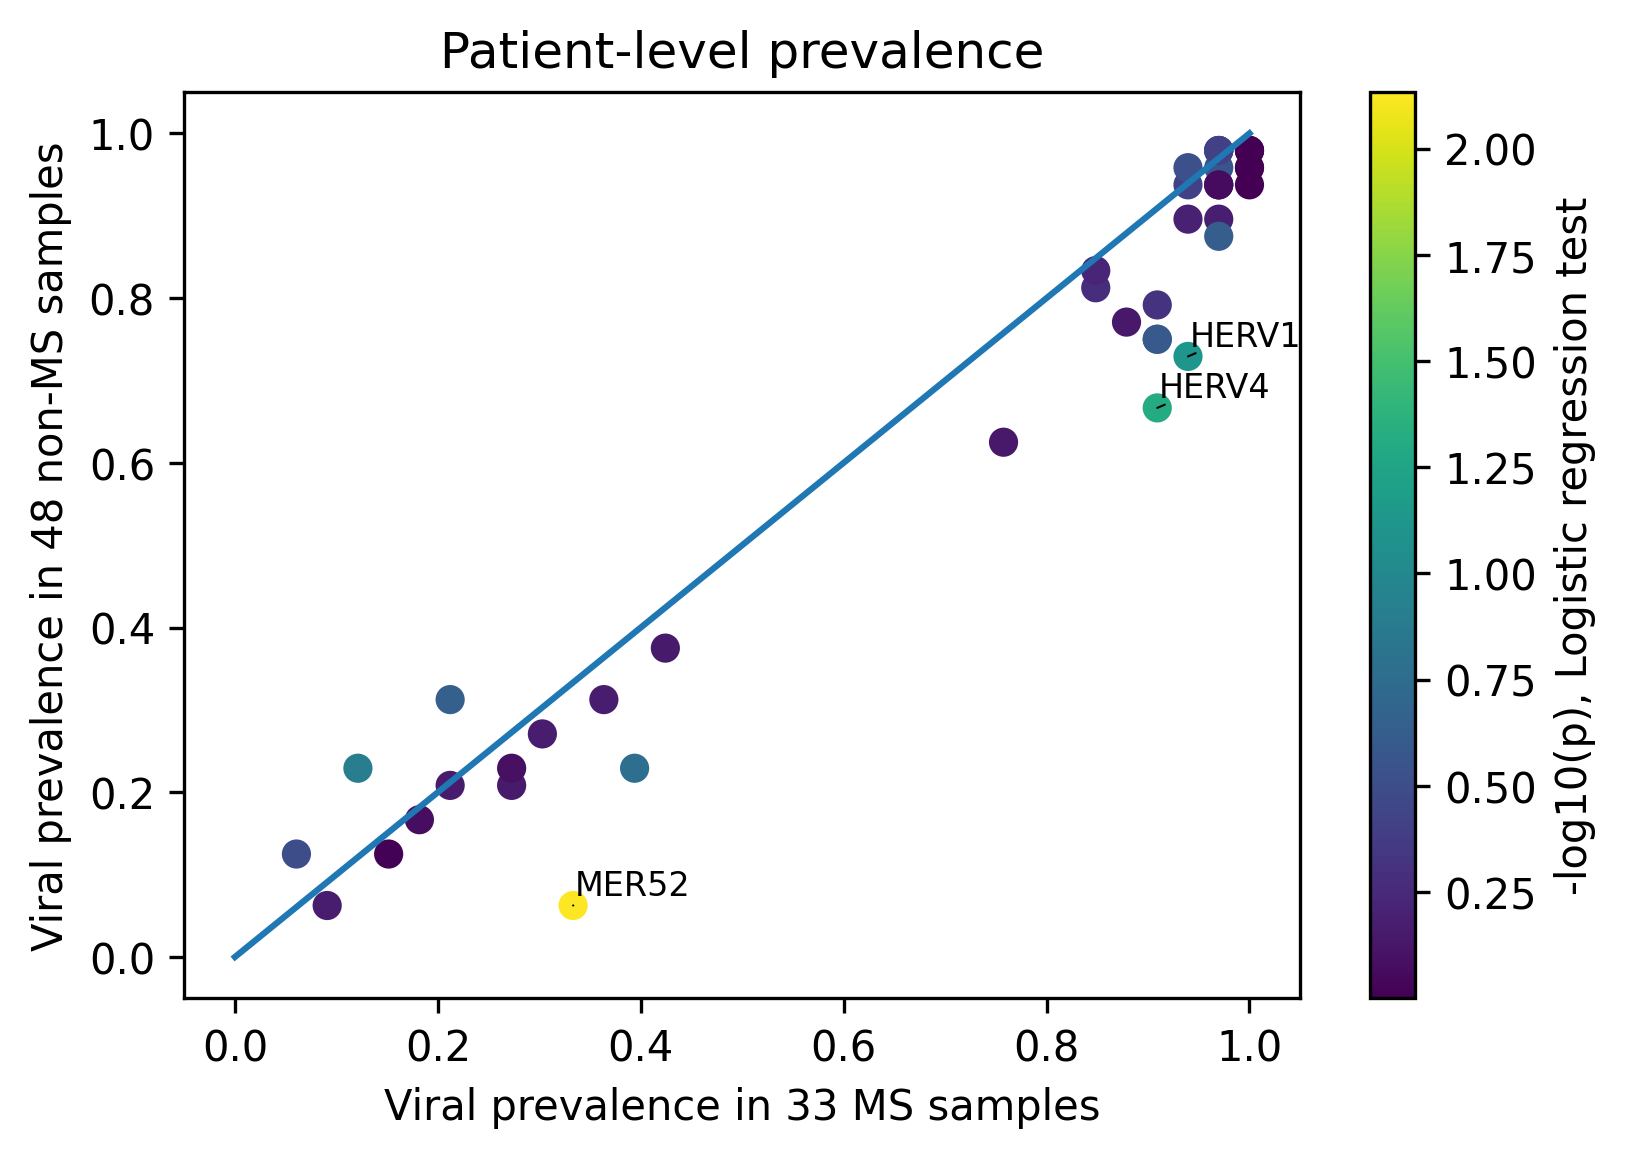

In [21]:
fig = plt.figure(dpi=300) #figsize=(5, 3.5)
plt.plot([0, 1], [0, 1])
plt.scatter(df_don_freq_use['MS_freq'] / 33, 
            df_don_freq_use['nonMS_freq'] / 48, 
            c=-np.log10(df_don_freq_use['logistic_pval']))

texts = []
for i in np.where(df_don_freq_use['logistic_pval'] <= 0.1)[0]:
    _label = df_don_freq_use.viral_info[i]
    _xx = df_don_freq_use['MS_freq'][i] / 33
    _yy = df_don_freq_use['nonMS_freq'][i] / 48
    texts.append(plt.text(_xx, _yy, _label, size=8))

from adjustText import adjust_text
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

plt.xlabel("Viral prevalence in 33 MS samples")
plt.ylabel("Viral prevalence in 48 non-MS samples")
plt.title("Patient-level prevalence")
plt.colorbar(label="-log10(p), Logistic regression test")
plt.show()

## Cell prevalence

#### Viral presence at cell level

In [22]:
pd.options.mode.chained_assignment = None  # default='warn'

def get_cell_prevalence(viral_mat, cell_info, cell_type=None, viral_idx=None):
    if cell_type is not None:
        idx = cell_info['Celltype'] == cell_type
        cell_info = cell_info.loc[idx, :]
        viral_mat = viral_mat[idx, :]
    
    if viral_idx is None:
        # viral_name = 'Hervs'
        cell_info.loc[:, 'viral'] = (viral_mat.T.A[0:, :].sum(axis=0) > 0).astype(int)
    else:
        # viral_name = 'viral%d' %(viral_idx + 1)
        cell_info.loc[:, 'viral'] = (viral_mat.T.A[viral_idx, :] > 0).astype(int)
    
    df_table = cell_info.groupby(['donor_id', 'disease']).agg(
        {'total_counts': 'mean', 'viral': ['sum', 'count']})

    df_table = df_table.reset_index(level=None)
    df_table['viral_prop'] = df_table[('viral', 'sum')] / df_table[('viral', 'count')]
    df_table['is_MS'] = (df_table['disease'] == 'MS').astype(np.float64)
    df_table['total_cells_log'] = np.log(df_table[('viral', 'count')])
    df_table['total_UMIs_LR'] = np.log(df_table[('total_counts', 'mean')] / 
                                       np.mean(df_table[('total_counts', 'mean')]))

    df_table['intecept'] = np.ones(df_table.shape[0])

    return df_table

In [23]:
# df_table = get_cell_prevalence(viral_mat, df_cell_lite, None, 789)
# df_table = get_cell_prevalence(viral_mat, df_cell_lite, 'T_CD4', 789)
df_table = get_cell_prevalence(viral_mat[:, 785:], df_cell_lite, None, None)

In [24]:
df_table

donor_id disease total_counts viral       viral_prop is_MS total_cells_log  \
                            mean   sum count                                    
0    TU0517      MS  2223.594119   209   375   0.557333   1.0        5.926926   
1    TU0522    NIND  3381.344113   131   159   0.823899   0.0        5.068904   
2    TU0523    NIND  3257.501772   389   413   0.941889   0.0        6.023448   
3    TU0527     IIH  2811.852362  3767  4042   0.931964   0.0        8.304495   
4    TU0529    NIND  3526.311936   352   404   0.871287   0.0        6.001415   
..      ...     ...          ...   ...   ...        ...   ...             ...   
76   TU0645    OIND  2615.549354    96   106   0.905660   0.0        4.663439   
77   TU0646    NIND  2939.139425   108   121   0.892562   0.0        4.795791   
78   TU0647    OIND  3502.089489   188   224   0.839286   0.0        5.411646   
79   TU0649      MS  2682.215790  1040  1138   0.913884   1.0        7.037028   
80   TU0650    NIND  2624.968335   155   189   0.820106   0.0        5.241747   

   total_UMIs_LR intecept  
                           
0      -0.157647      1.0  
1       0.261501      1.0  
2       0.224189      1.0  
3       0.077072      1.0  
4       0.303481      1.0  
..           ...      ...  
76      0.004702      1.0  
77      0.121345      1.0  
78      0.296588      1.0  
79      0.029871      1.0  
80      0.008297      1.0  

[81 rows x 10 columns]

In [25]:
# np.sum(df_table['viral_prop'] > 0)
np.sum(df_table[('viral', 'sum')] > 0)

81

In [26]:
import statsmodels.api as sm

## To fit dispersion alpha
model_full = sm.NegativeBinomial(
    df_table[('viral', 'sum')], 
    df_table[['is_MS', 'total_cells_log', 'total_UMIs_LR', 'intecept']],
).fit_regularized()

model_full.summary()

## With pre-defined alpha
# _model = sm.GLM(
#     df_table[('viral', 'sum')], 
#     df_table[['is_MS', 'total_UMIs_LR', 'intecept']],
#     offset=df_table['total_cells_log'],
#     family=sm.families.NegativeBinomial(alpha=0.13)
# ).fit()

# # negative binomial regression    
# _model = sm.GLM(
#     df_table[('viral', 'sum')], 
#     df_table[['is_MS', 'total_UMIs_LR', 'intecept']],
#     offset=df_table['total_cells_log'],
#     # family=sm.families.NegativeBinomial(alpha=model_full.params['alpha'])
# ).fit()

# _model = sm.NegativeBinomial(
#     df_table[('viral', 'sum')], 
#     df_table[['is_MS', 'total_cells_log', 'total_UMIs_LR', 'intecept']],
# ).fit_regularized()



Optimization terminated successfully    (Exit mode 0)
            Current function value: 5.456931731144229
            Iterations: 20
            Function evaluations: 37
            Gradient evaluations: 20


/home/yuanhua/.conda/envs/TFProb/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: overflow encountered in exp
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/home/yuanhua/.conda/envs/TFProb/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: overflow encountered in exp
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/home/yuanhua/.conda/envs/TFProb/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:2631: RuntimeWarning: invalid value encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
/home/yuanhua/.conda/envs/TFProb/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:2631: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:       ('viral', 'sum')   No. Observations:                   81
Model:               NegativeBinomial   Df Residuals:                       77
Method:                           MLE   Df Model:                            3
Date:                Sun, 08 Oct 2023   Pseudo R-squ.:                  0.3119
Time:                        22:35:22   Log-Likelihood:                -442.01
converged:                       True   LL-Null:                       -642.41
Covariance Type:            nonrobust   LLR p-value:                 1.490e-86
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
is_MS               0.0540      0.026      2.061      0.039       0.003       0.105
total_cells_log     1.0262      0.012     88.872      0.000       1.004       1.049
total_UMIs_LR       0.3518      0.052      6.746      0.000       0.250       0.454
intecept           -0.3190      0.076     -4.184      0.000      -0.468      -0.170
alpha               0.0102      0.002      4.892      0.000       0.006       0.014
===================================================================================
"""

In [27]:
cell_types = [None, 'T_CD4', 'T_CD8', 'NK']
# , 'B_cell', 'Monocyte', 'Macrophage']

# cell_types = [None, 'T_CD4', 'T_CD8', 'NK', 'B_cell', 'B_plasma', 
#               'Monocyte', 'Macrophage', 'pcDC']

viral_comm = np.where(
    (df_don_freq['MS_freq'] >= 0.05 * 33) * 
    (df_don_freq['nonMS_freq'] >= 0.05 * 48))[0]

pval_mat = np.ones((len(cell_types), len(viral_comm)))
fdr_mat = np.ones((len(cell_types), len(viral_comm)))
for i in range(len(cell_types)):
    print(i)
    for j in range(len(viral_comm)):
        df_table = get_cell_prevalence(viral_mat, df_cell_lite, cell_types[i], viral_comm[j])
        
        try:
            _model = sm.OLS(
                df_table[('viral', 'sum')], 
                df_table[['is_MS', 'total_cells_log', 'total_UMIs_LR', 'intecept']],
            ).fit()

            pval_mat[i,j] = _model.pvalues['is_MS']
        except:
            pval_mat[i,j] = np.nan
            
    idx = ~np.isnan(pval_mat[i, :])
    fdr_mat[i, :] = pval_mat[i, :]
    fdr_mat[i, idx] = fdrcorrection(pval_mat[i, idx])[1]

0
1
2
3


In [28]:
# for pan virus
pval_mat[:, -1]

array([0.57248273, 0.92171025, 0.93998875, 0.10991039])

In [29]:
idx_i, idx_j = np.where(pval_mat < 0.05)
idx_i, idx_j, len(idx_i)

(array([0, 0, 0, 0, 1, 1, 3, 3]), array([30, 41, 63, 64, 41, 64, 24, 59]), 8)

In [30]:
df_don_freq.loc[df_don_freq.index[viral_comm[idx_j]], :]

,MS_freq,nonMS_freq,logistic_pval,viral_info
viral790,11.0,3.0,0.007364,MER52
viral808,31.0,45.0,0.387769,MER50
viral831,7.0,15.0,0.230721,HERVL66
viral832,32.0,45.0,0.860844,LTR57
viral808,31.0,45.0,0.387769,MER50
viral832,32.0,45.0,0.860844,LTR57
viral784,32.0,45.0,0.379555,HERV30
viral827,32.0,47.0,0.389840,HML10


0 30 789 14 0.4850708999105902 0.015028932677697117 0.008719389155631054


/home/yuanhua/.conda/envs/TFProb/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/yuanhua/.conda/envs/TFProb/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


0 41 807 76 0.4850708999105902 0.02939823635821759 0.0844518995829204
0 63 830 22 0.4850708999105902 0.028528170192672793 0.37042484906480555


/home/yuanhua/.conda/envs/TFProb/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/yuanhua/.conda/envs/TFProb/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


0 64 831 77 0.4850708999105902 0.020437174668748583 0.09438979712472043
1 41 807 67 0.8561771278417639 0.02594476144975042 0.048208479788081085
1 64 831 71 0.8561771278417639 0.016861065656743265 0.03159020290198107
3 24 783 31 0.19364858951001193 0.03133828101622513 0.14674045035527333


/home/yuanhua/.conda/envs/TFProb/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/yuanhua/.conda/envs/TFProb/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


3 59 826 37 0.19364858951001193 0.04727557445151719 0.30360598027624586


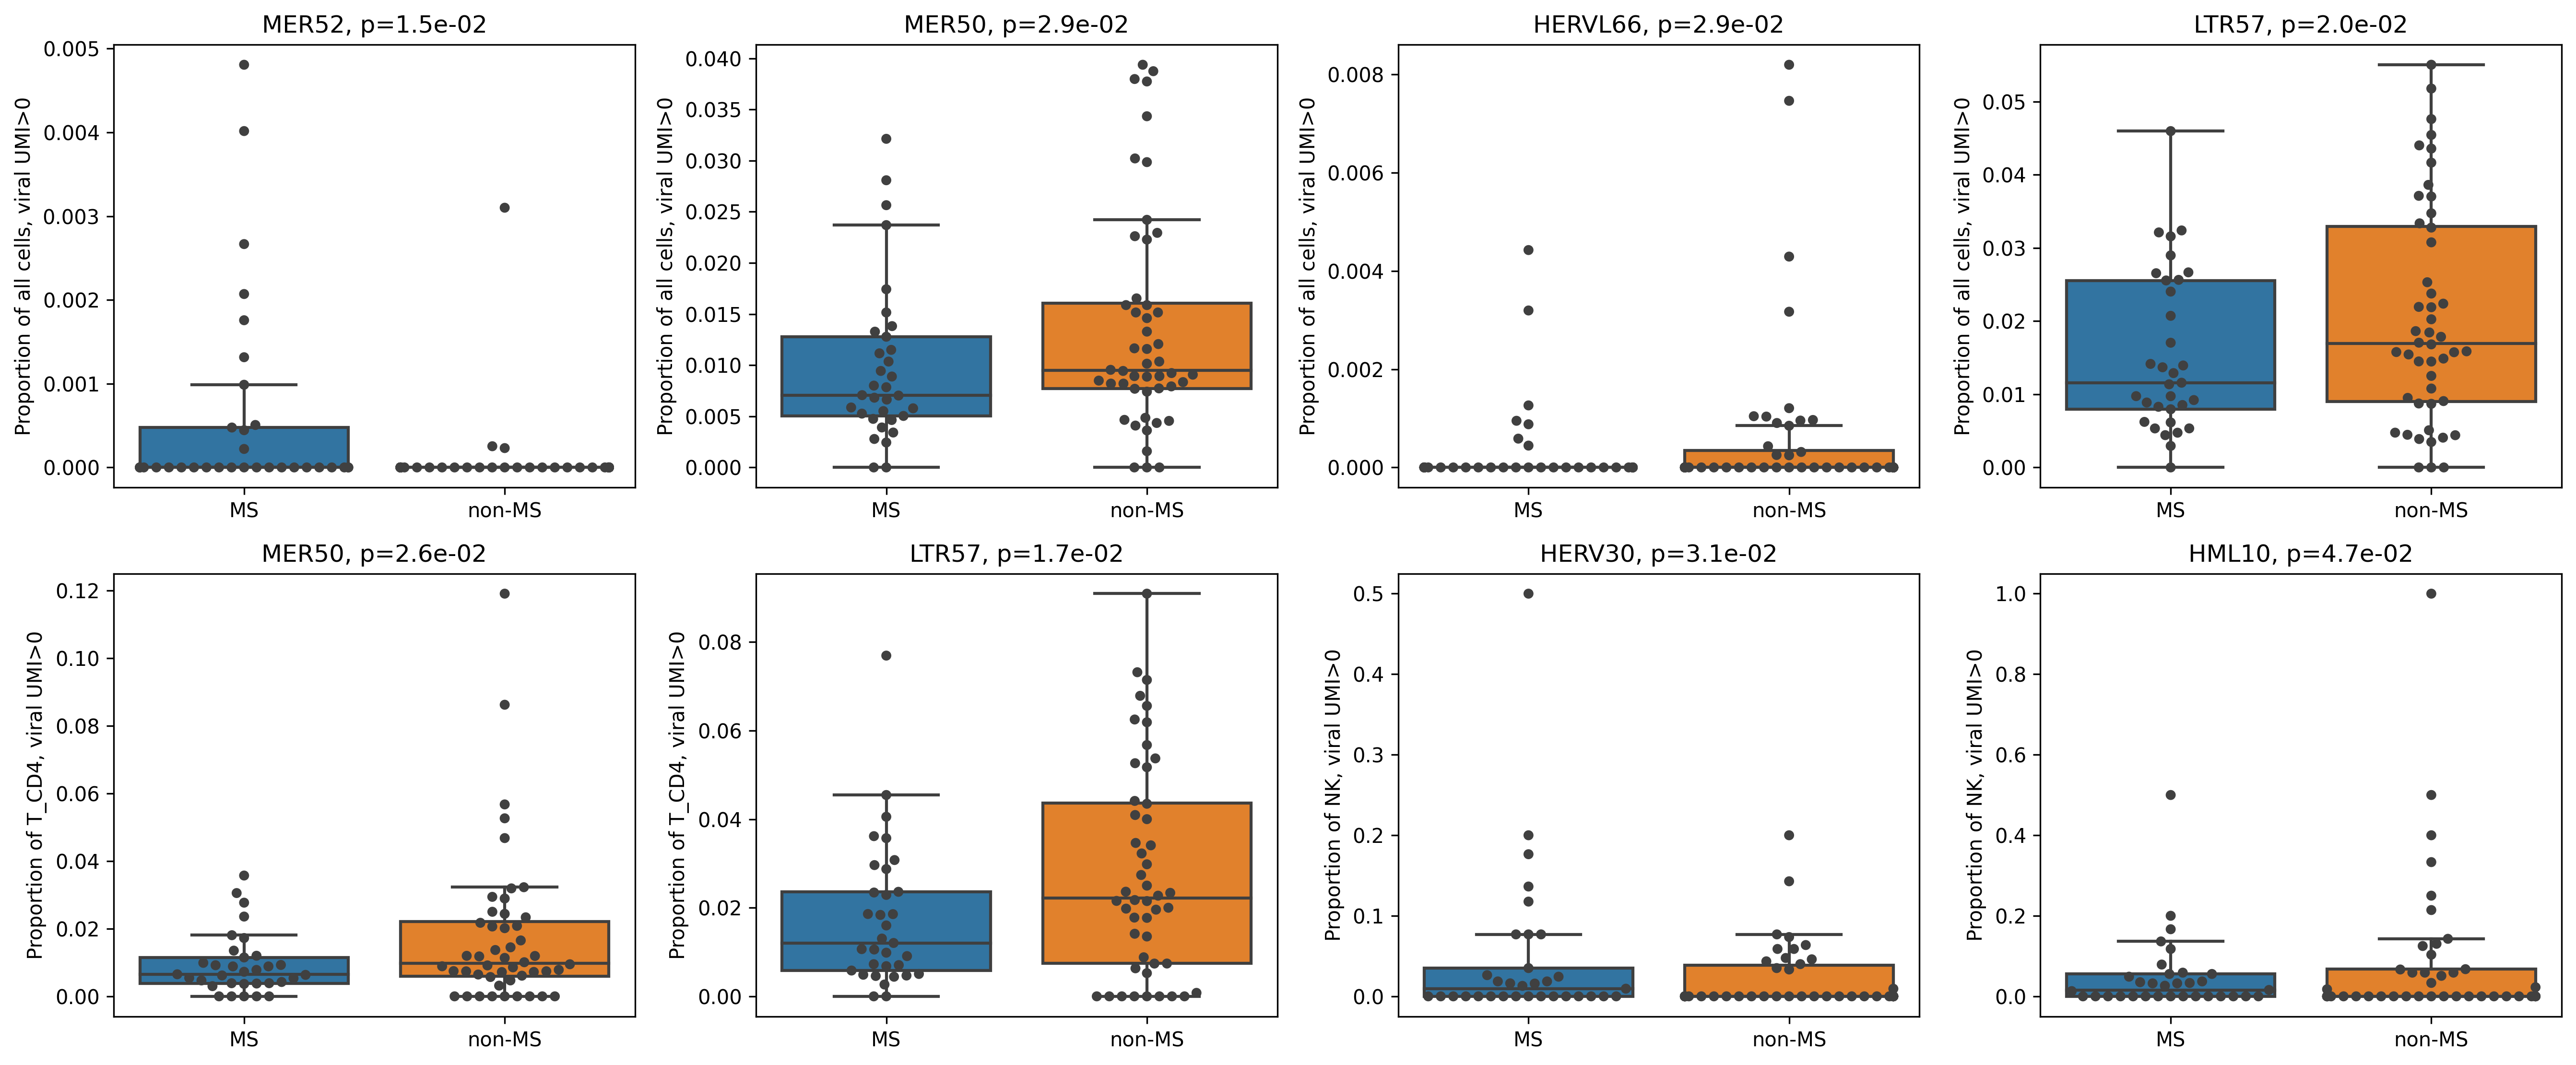

In [31]:
idx_i, idx_j = np.where(pval_mat < 0.05)

fig = plt.figure(figsize=(18, 7.5), dpi=300)
for k in range(min(len(idx_i), 24)):
    ii, jj = idx_i[k], idx_j[k]
    df_table = get_cell_prevalence(viral_mat, df_cell_lite, 
                                   cell_types[ii], viral_comm[jj])
    
    df_table['is_MS'] = ['MS' if x else 'non-MS' for x in df_table['is_MS']]
    
    import scipy.stats as st
    ttest_pval = st.ttest_ind(
        df_table['viral_prop'][df_table['is_MS'] == 'MS'],
        df_table['viral_prop'][df_table['is_MS'] != 'MS']
    )[1]
    print(ii, jj, viral_comm[jj], np.sum(df_table['viral_prop'] > 0),
          fdr_mat[ii, jj], pval_mat[ii, jj], ttest_pval)
    
    plt.subplot(2, 4, 1+k)
    ax = sns.boxplot(y='viral_prop', x="is_MS", data=df_table, fliersize=0)
    ax = sns.swarmplot(y='viral_prop', x="is_MS", 
                       data=df_table, color=".25")

    plt.title("%s, p=%.1e" %(df_virus.viral_info[viral_comm[jj]], pval_mat[ii,jj]))
    plt.xlabel("")
    if cell_types[ii] is not None:
        plt.ylabel("Proportion of %s" %(cell_types[ii]) + ", viral UMI>0")
    else:
        plt.ylabel("Proportion of all cells, viral UMI>0")
    
plt.tight_layout()
plt.show()

0 65 833 81 0.862866361324494 0.5724827276849876 0.14002905668992024


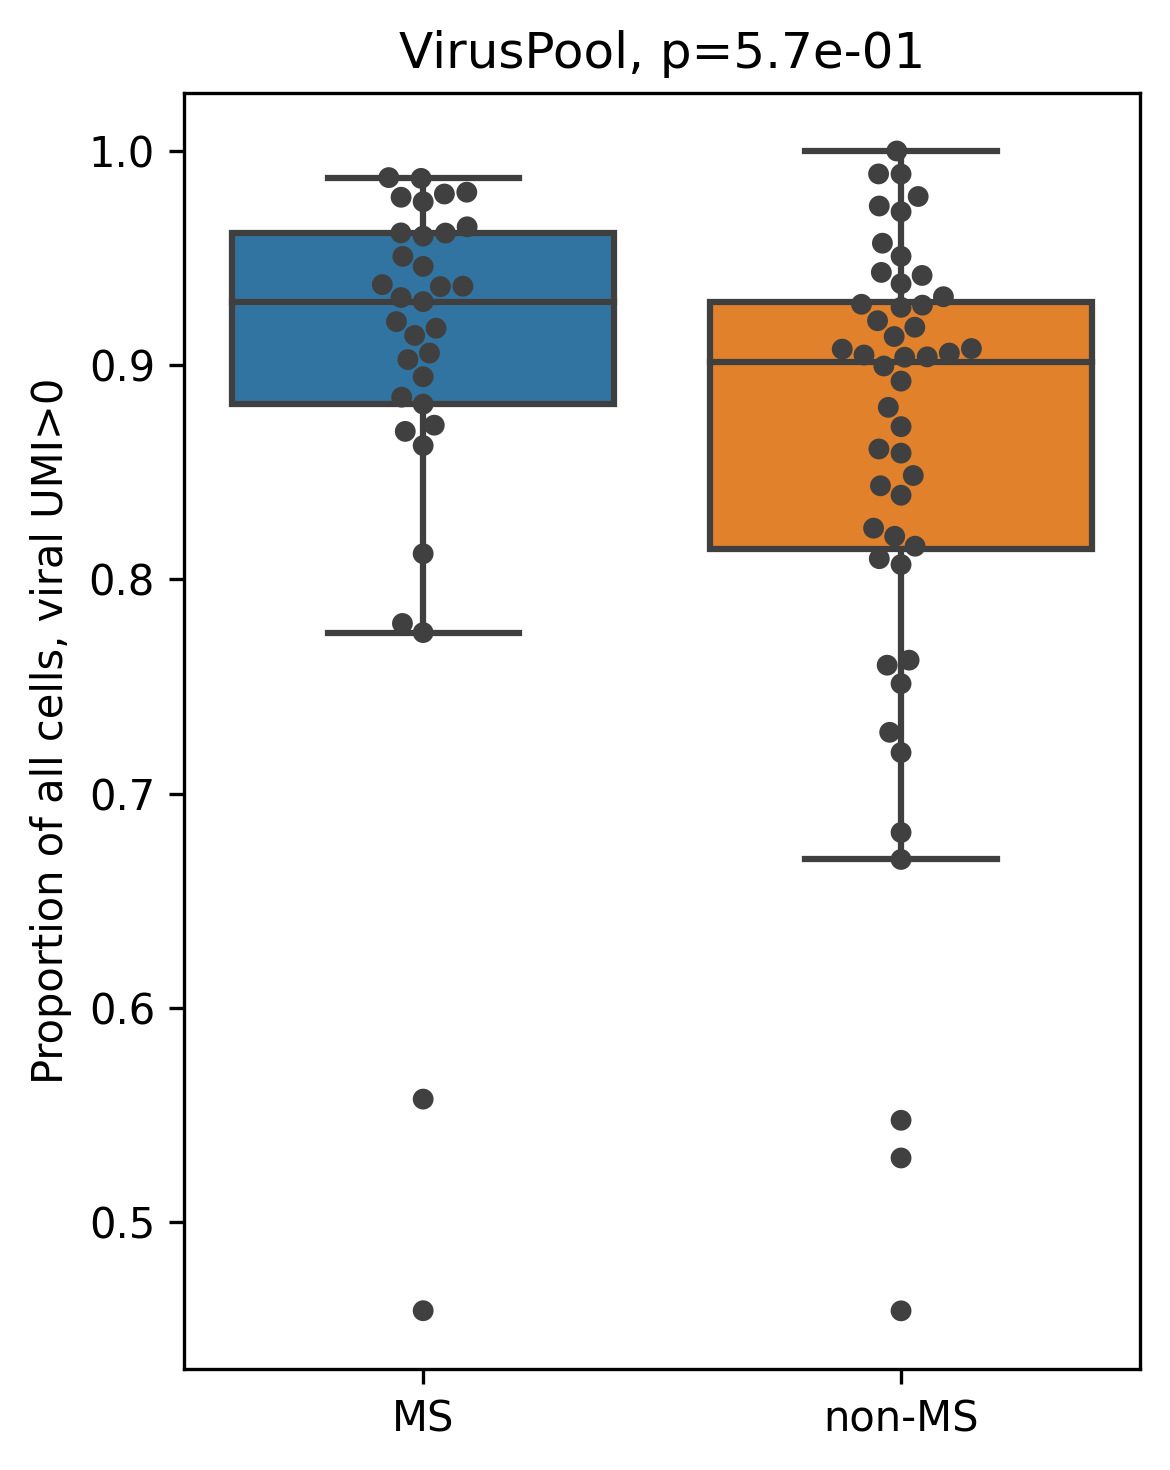

In [32]:
ii, jj = 0, pval_mat.shape[1]-1

df_table = get_cell_prevalence(viral_mat, df_cell_lite, 
                               cell_types[ii], viral_comm[jj])

df_table['is_MS'] = ['MS' if x else 'non-MS' for x in df_table['is_MS']]

import scipy.stats as st
ttest_pval = st.ttest_ind(
    df_table['viral_prop'][df_table['is_MS'] == 'MS'],
    df_table['viral_prop'][df_table['is_MS'] != 'MS']
)[1]
print(ii, jj, viral_comm[jj], np.sum(df_table['viral_prop'] > 0),
      fdr_mat[ii, jj], pval_mat[ii, jj], ttest_pval)

fig = plt.figure(figsize=(4, 5), dpi=300)
sns.boxplot(y='viral_prop', x="is_MS", data=df_table, fliersize=0)
sns.swarmplot(y='viral_prop', x="is_MS", data=df_table, color=".25")

plt.title("%s, p=%.1e" %(df_virus.viral_info[viral_comm[jj]], pval_mat[ii,jj]))
plt.xlabel("")
if cell_types[ii] is not None:
    plt.ylabel("Proportion of %s" %(cell_types[ii]) + ", viral UMI>0")
else:
    plt.ylabel("Proportion of all cells, viral UMI>0")
plt.tight_layout()

fig_dir = '/usersdata/yuanhua/msNewData/figures/'
plt.savefig(fig_dir + '/viral_any_boxplot.pdf')

plt.show()